In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.style.use('seaborn-white')
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
plt.rcParams.update({"axes.grid": True,"grid.color": "#2A3459"})

C:\Users\zijia\AppData\Local\Temp\ipykernel_35480\1813089224.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [54]:
df = pd.read_csv(r'C:\Users\zijia\Desktop\AAPL_stock.csv')
print(df)

             Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.100178   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.094952   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.087983   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.090160   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092774   
...           ...         ...         ...         ...         ...         ...   
10438  2022-05-06  156.009995  159.440002  154.179993  157.279999  157.279999   
10439  2022-05-09  154.929993  155.830002  151.490005  152.059998  152.059998   
10440  2022-05-10  155.520004  156.740005  152.929993  154.509995  154.509995   
10441  2022-05-11  153.500000  155.449997  145.809998  146.500000  146.500000   
10442  2022-05-12  142.770004  146.199997  138.800003  142.559998  142.559998   

          Volume  
0      4

In [66]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [61]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10443.000000,10443.000000,10443.000000,10443.000000,10443.000000,1.044300e+04
mean,14.453559,14.611925,14.294785,14.458603,13.823986,3.314118e+08
std,31.337795,31.699692,30.979093,31.351249,31.046629,3.390498e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289063,0.275893,0.282891,0.235214,1.241298e+08
50%,0.472321,0.481429,0.464286,0.473214,0.389186,2.188788e+08
75%,14.445892,14.601071,14.297321,14.463393,12.409363,4.116770e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10443 entries, 0 to 10442
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10443 non-null  object 
 1   Open       10443 non-null  float64
 2   High       10443 non-null  float64
 3   Low        10443 non-null  float64
 4   Close      10443 non-null  float64
 5   Adj Close  10443 non-null  float64
 6   Volume     10443 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 571.2+ KB


In [95]:
corr = df.corr()
corr.style.background_gradient(cmap ='coolwarm')

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999945,0.999925,0.999854,0.999512,-0.193404
High,0.999945,1.000000,0.999909,0.999925,0.999608,-0.192822
Low,0.999925,0.999909,1.000000,0.999930,0.999570,-0.194356
Close,0.999854,0.999925,0.999930,1.000000,0.999662,-0.193608
Adj Close,0.999512,0.999608,0.999570,0.999662,1.000000,-0.196533
Volume,-0.193404,-0.192822,-0.194356,-0.193608,-0.196533,1.000000


In [64]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [10]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-06,156.009995,159.440002,154.179993,157.279999,157.279999,116055700
2022-05-09,154.929993,155.830002,151.490005,152.059998,152.059998,131577900
2022-05-10,155.520004,156.740005,152.929993,154.509995,154.509995,115366700
2022-05-11,153.500000,155.449997,145.809998,146.500000,146.500000,142689800
2022-05-12,142.770004,146.199997,138.800003,142.559998,142.559998,182271000


<Axes: xlabel='Date'>

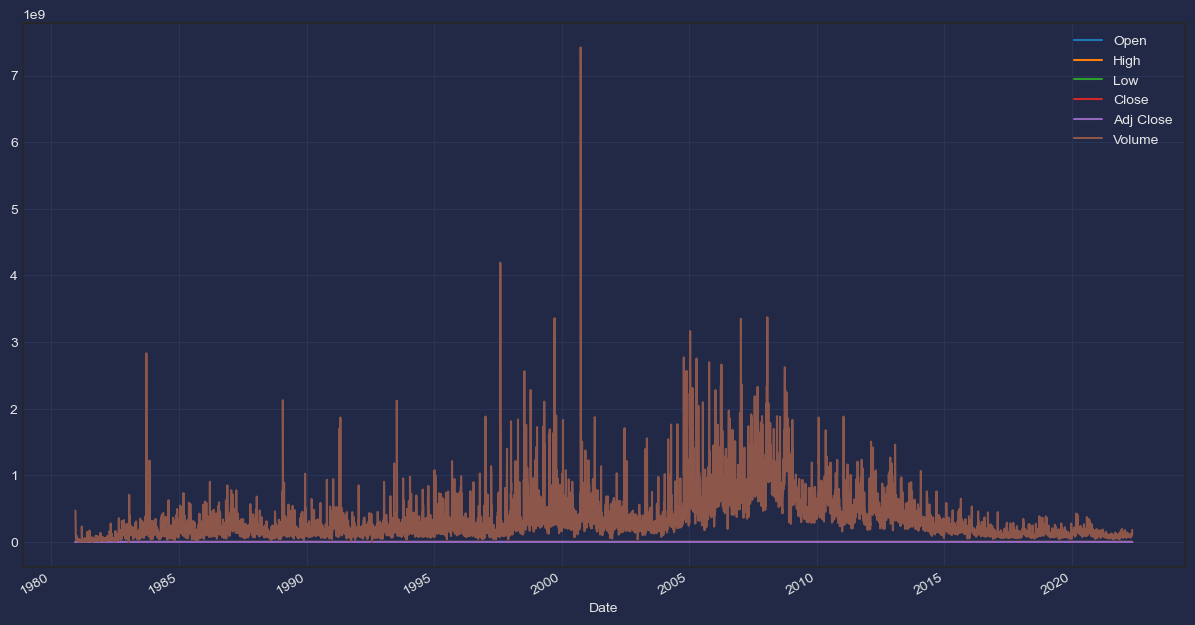

In [11]:
df.plot(figsize = (15,8))

Text(0.5, 1.0, 'Open and Close prices for Apple')

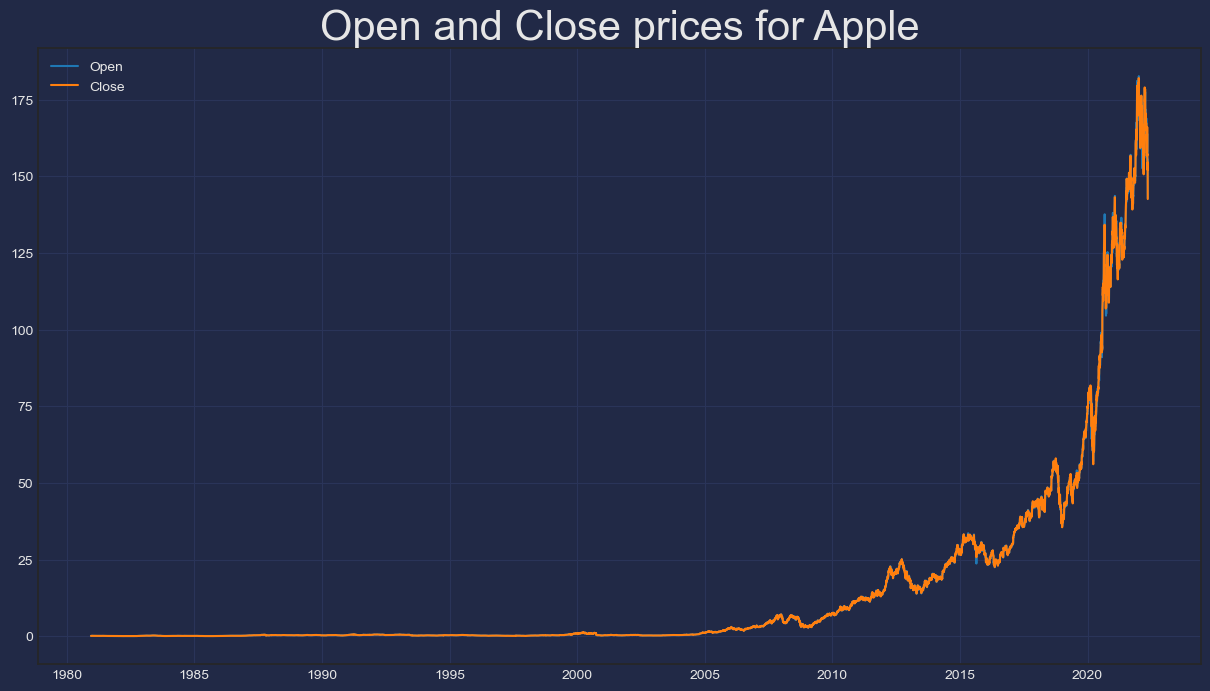

In [12]:
plt.figure(figsize =(15,8))
plt.plot(df['Open'])
plt.plot(df['Close'])
plt.legend(['Open','Close'])
plt.title('Open and Close prices for Apple', fontsize = 30)

Text(0.5, 1.0, 'High and Low prices for Apple')

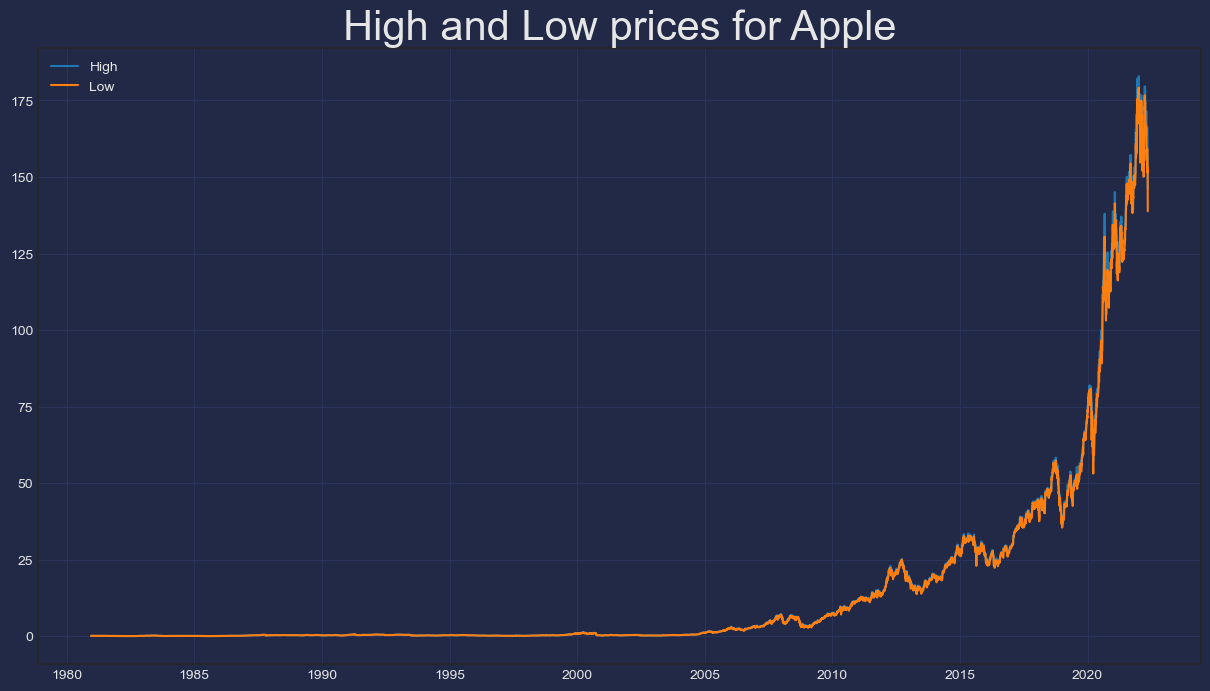

In [13]:
plt.figure(figsize =(15,8))
plt.plot(df['High'])
plt.plot(df['Low'])
plt.legend(['High','Low'])
plt.title('High and Low prices for Apple', fontsize = 30)

In [14]:
df['MA30'] = df['Adj Close'].rolling(window = 30).mean()
df['MA100'] = df['Adj Close'].rolling(window = 100).mean()

Text(0.5, 1.0, 'Close Price and Mean Average')

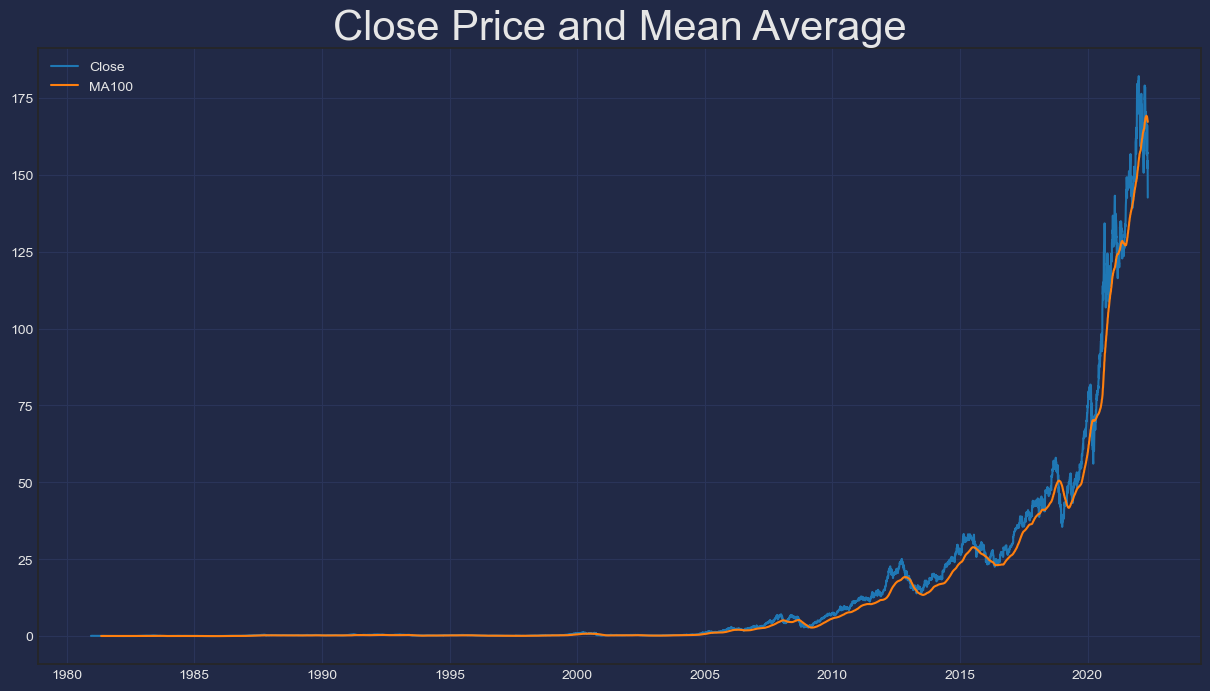

In [15]:
import matplotlib.pyplot as plt

figure_size = (15, 8)
close_prices = df['Close']
ma_100 = df['MA100']
legend_labels = ['Close', 'MA100']
title = 'Close Price and Mean Average'

plt.figure(figsize=figure_size)
plt.plot(close_prices)
plt.plot(ma_100)
plt.legend(legend_labels)
plt.title(title, fontsize=30)

In [16]:
def get_RSI(df, column = 'Adj Close', time_window = 14):
    # Return the RSI indicator for the specified time window

    diff = df[column].diff(1)

    # This preservers dimensions off diff values. 
    up_chg = 0 * diff
    down_chg = 0 * diff

    # Up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff >0] = diff[diff > 0]

    # Down change is equal to negative difference, otherwise equal to zero
    down_chg[diff < 0] = diff[diff <0]

    # We set com = time_window-1 so we get decay alpha =1/time_window.
    up_chg_avg = up_chg.ewm(com=time_window -1,min_periods = time_window).mean()
    down_chg_avg = down_chg.ewm(com = time_window -1, min_periods = time_window).mean()

    RS = abs(up_chg_avg/down_chg_avg)
    df['RSI'] = 100 - 100 / (1 + RS)

    return df

In [17]:
get_RSI(df)

,Open,High,Low,Close,Adj Close,Volume,MA30,MA100,RSI
Date,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600,NaN,NaN,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800,NaN,NaN,NaN
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000,NaN,NaN,NaN
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600,NaN,NaN,NaN
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-05-06,156.009995,159.440002,154.179993,157.279999,157.279999,116055700,166.948744,168.141585,42.757372
2022-05-09,154.929993,155.830002,151.490005,152.059998,152.059998,131577900,166.201955,167.923658,38.033477
2022-05-10,155.520004,156.740005,152.929993,154.509995,154.509995,115366700,165.507542,167.680667,41.310856


Text(0.5, 1.0, 'Relative Strength Index')

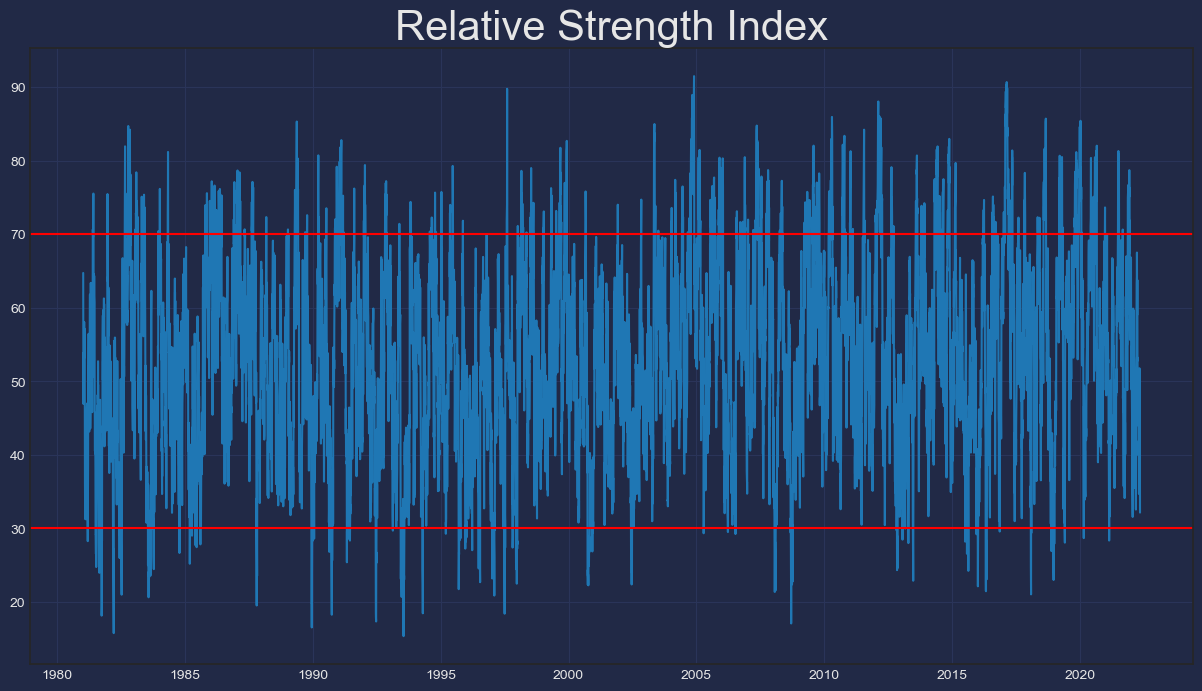

In [18]:
plt.figure(figsize = (15,8))
plt.plot(df['RSI'])
plt.axhline(y = 70,color ='red')
plt.axhline(y = 30,color ='red')
plt.title('Relative Strength Index', fontsize = 30)

In [19]:
data = pd.DataFrame()
data['Apple'] = df['Adj Close']
data['MA30'] = df['MA30']
data['MA100'] = df['MA100']
data

,Apple,MA30,MA100
Date,,,
1980-12-12,0.100178,NaN,NaN
1980-12-15,0.094952,NaN,NaN
1980-12-16,0.087983,NaN,NaN
1980-12-17,0.090160,NaN,NaN
1980-12-18,0.092774,NaN,NaN
...,...,...,...
2022-05-06,157.279999,166.948744,168.141585
2022-05-09,152.059998,166.201955,167.923658
2022-05-10,154.509995,165.507542,167.680667


In [20]:
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1

    for i in range(len(data)):
        if data['MA30'][i] > data['MA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data['Apple'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['MA30'][i] < data['MA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['Apple'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)

    return (sigPriceBuy,sigPriceSell)

In [21]:
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

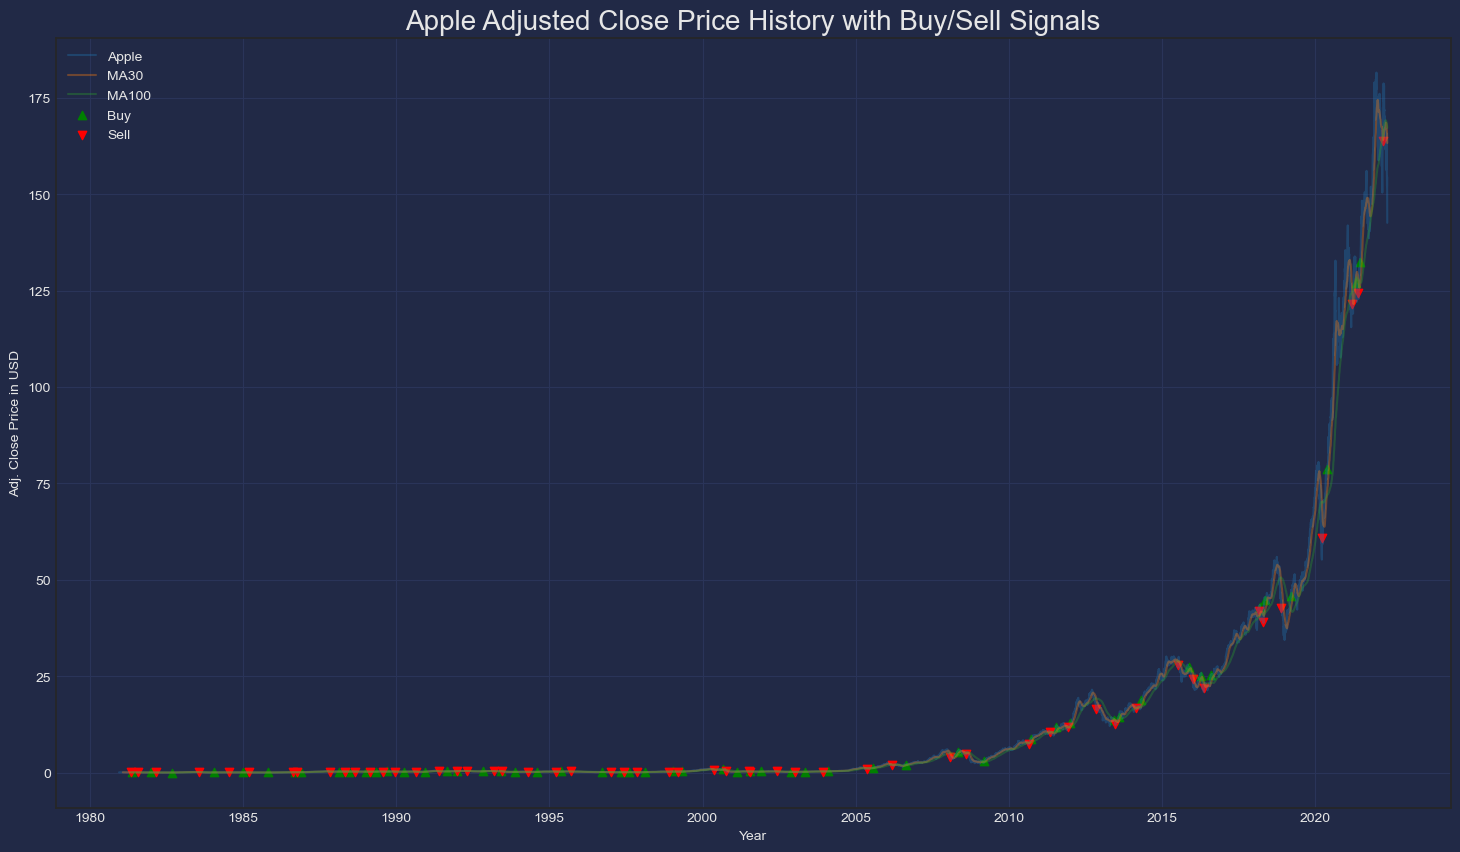

In [22]:
plt.figure(figsize=(18,10))
plt.plot(data['Apple'], label = 'Apple', alpha=0.35)
plt.plot(data['MA30'], label = 'MA30', alpha=0.35)
plt.plot(data['MA100'], label = 'MA100', alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Apple Adjusted Close Price History with Buy/Sell Signals',fontsize = 20)
plt.xlabel('Year')
plt.ylabel('Adj. Close Price in USD')
plt.legend(loc='upper left')
plt.show()


In [23]:
period = 20
# simple moving average
df['MA'] = df['Close'].rolling(window = period).mean()
# Standard Deviation
df['STD'] = df['Close'].rolling(window = period).std()
#Upper Band
df['Upper'] = df['MA'] + (df['STD'] * 2)
#Lower Band
df['Lower'] = df['MA'] - (df['STD'] * 2)

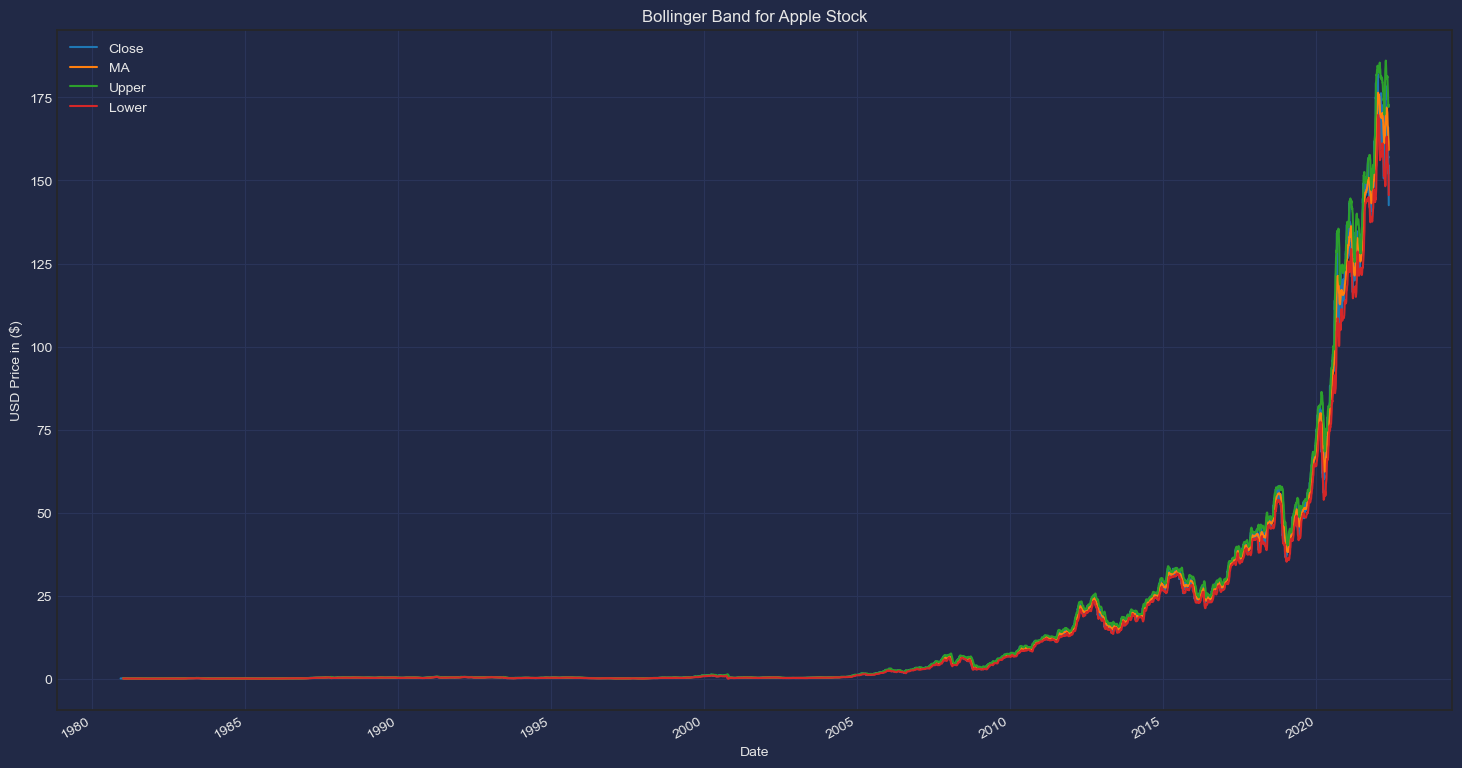

In [24]:
column_list = ['Close','MA','Upper','Lower']
df[column_list].plot(figsize = (18,10))
plt.title('Bollinger Band for Apple Stock')
plt.ylabel('USD Price in ($)')
plt.show()

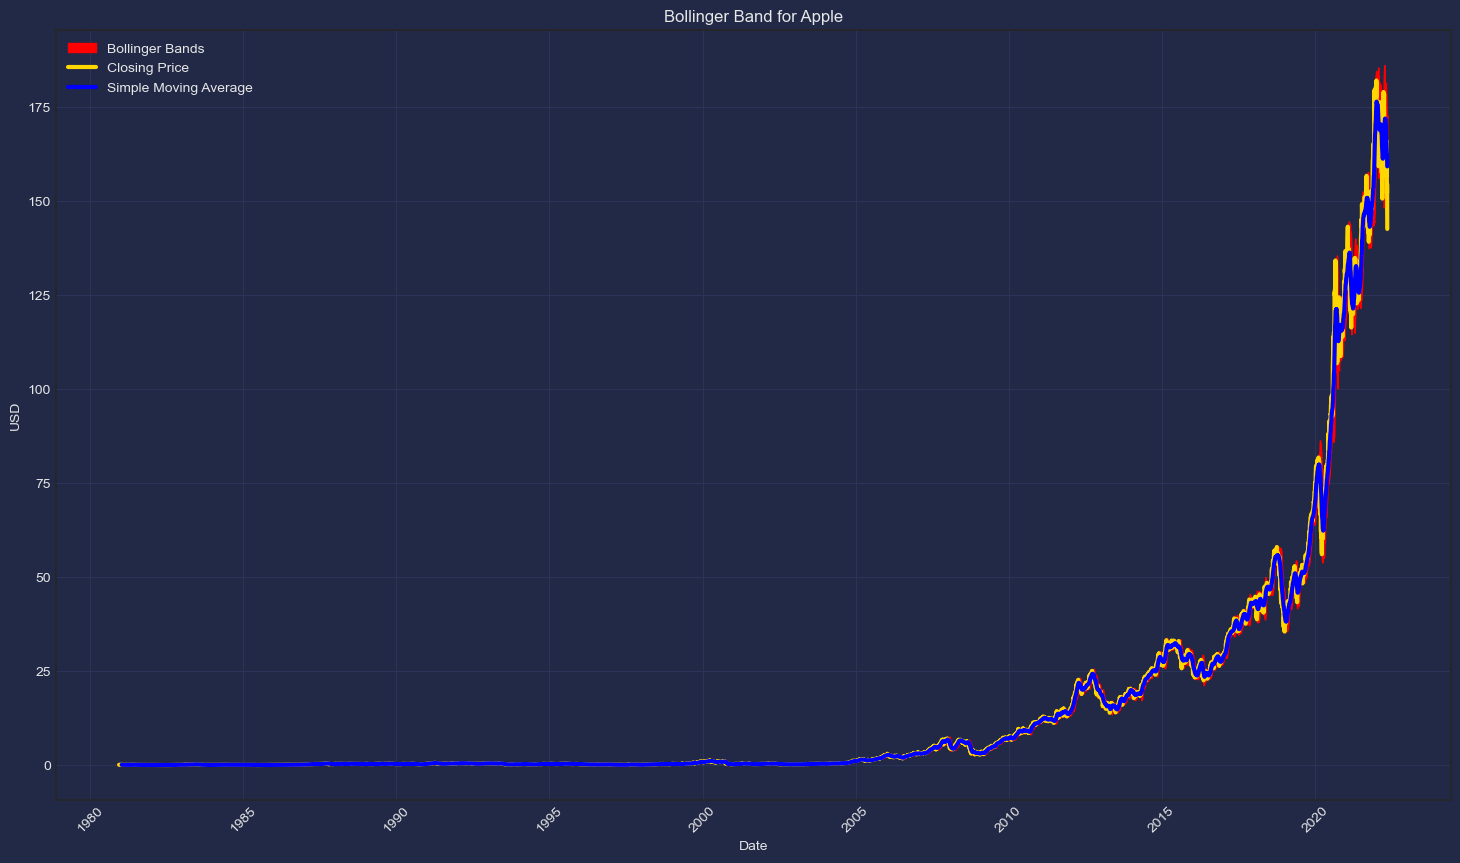

In [25]:
fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(1,1,1)
x_axis = df.index
ax.fill_between(x_axis,df['Upper'], df['Lower'],label ='Bollinger Bands',color = 'red')
ax.plot(x_axis, df['Close'], color = 'gold',lw = 3, label= 'Closing Price')
ax.plot(x_axis, df['MA'], color = 'blue', lw=3, label='Simple Moving Average')
ax.set_title('Bollinger Band for Apple')
ax.set_xlabel('Date')
ax.set_ylabel('USD')
plt.xticks(rotation = 45)
ax.legend()
plt.show()

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
apple_month = df['Close'].resample('MS').mean()

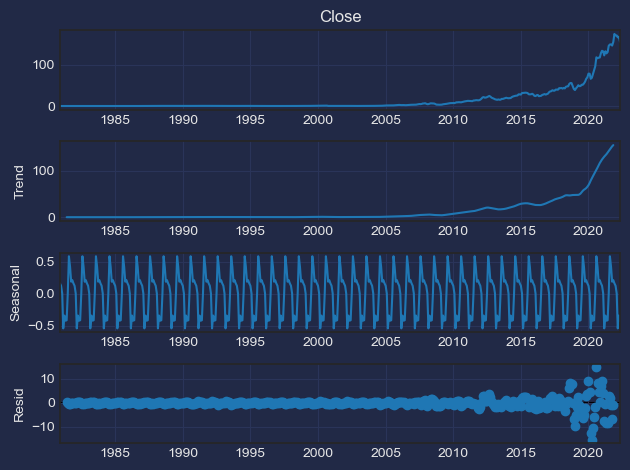

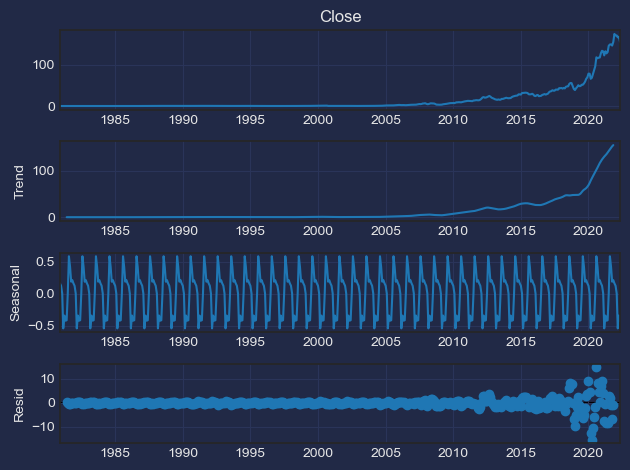

In [27]:
decomposition = seasonal_decompose(apple_month, model= 'additive')
decomposition.plot()

<Axes: xlabel='High', ylabel='MA'>

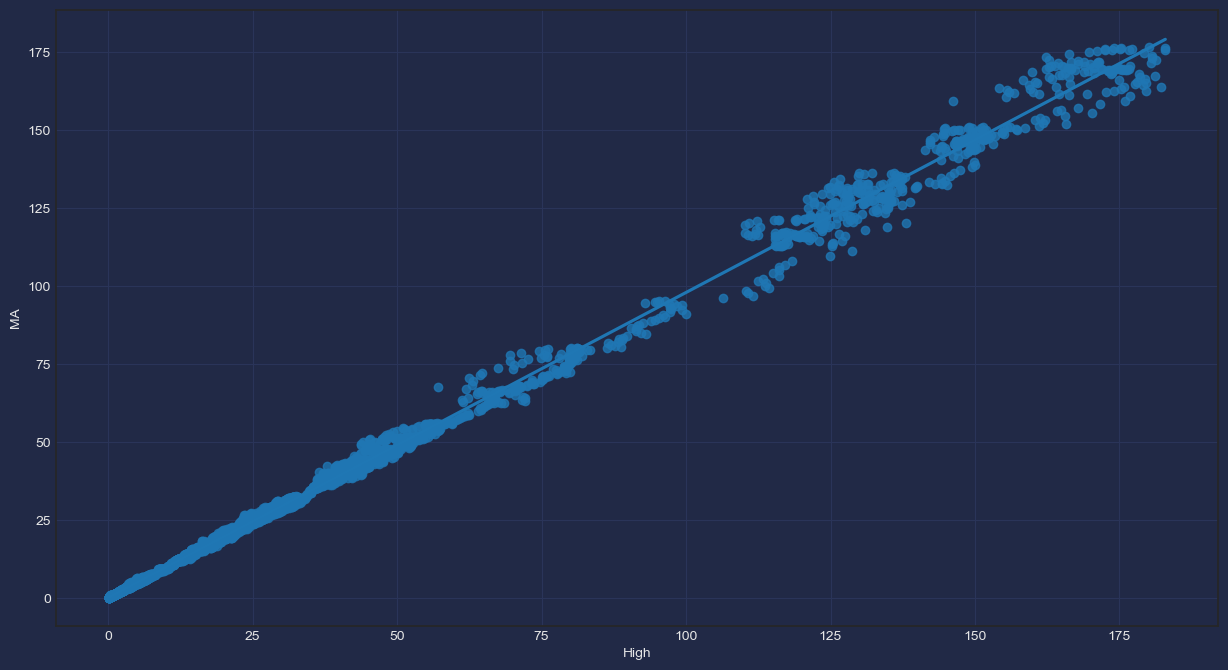

In [28]:
plt.figure(figsize = (15,8))
sns.regplot(x = 'High',y ='MA',data =df)

In [29]:
#LSRM Modelling
from keras.layers import LSTM, Dense, Activation, Dropout, TimeDistributed
from keras.models import Sequential

In [33]:
train_df = df['High'].iloc[:-4]

X_train = []
y_train = []

for i in range(2, len(train_df)):
  X_train.append(train_df[i-2:i])
  y_train.append(train_df[i])

In [34]:
import math
train_len = math.ceil(len(train_df)*0.8)
train_len

8352

In [35]:
X_train, y_train= np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [36]:
model=Sequential()
model.add(LSTM(50,activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=False)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________


<Axes: >

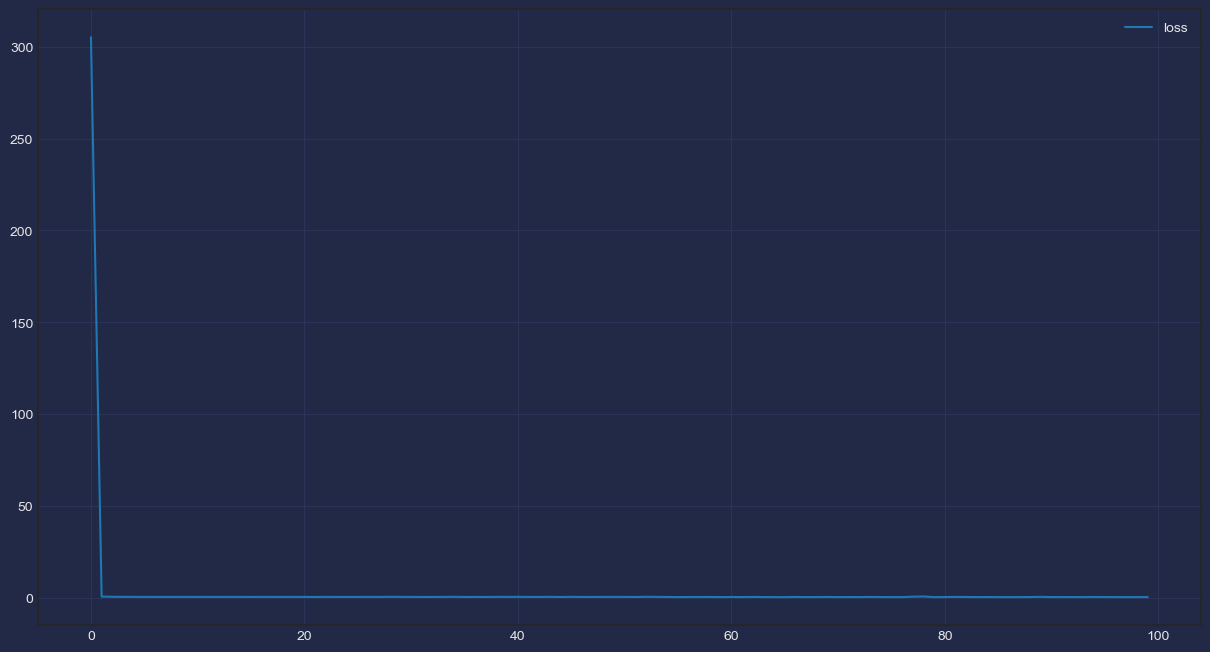

In [37]:
loss_model = pd.DataFrame(model.history.history)
loss_model[['loss']].plot(figsize =(15,8))

In [38]:
test_data = train_df[train_len-2:]
X_val=[]
Y_val=[] 

for i in range(2, len(test_data)):
    X_val.append(test_data[i-2:i])
    Y_val.append(test_data[i])

In [39]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
prediction = model.predict(X_val)

66/66 [==============================] - 0s 1ms/step


In [40]:
from sklearn.metrics import mean_squared_error
# Know the model error accuracy | the model accuracy 
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

66/66 [==============================] - 0s 3ms/step
Train rmse: 0.5705157952563921
Validation rmse: 1.2598358933535905


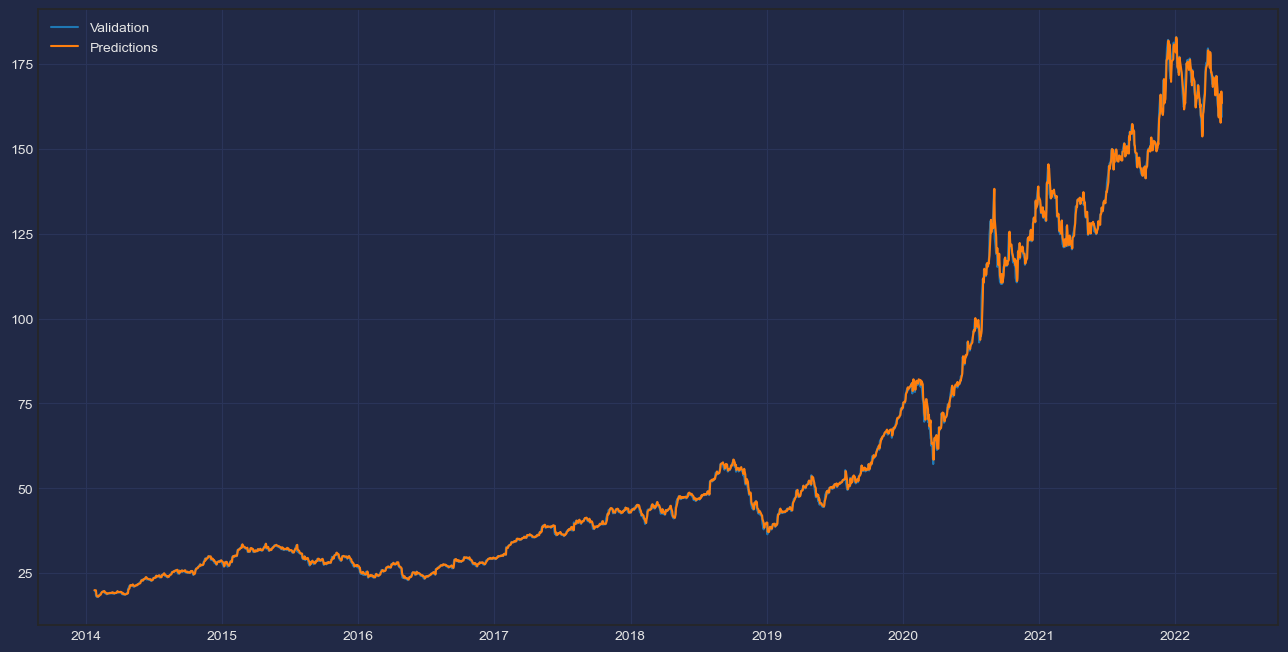

In [41]:
valid = pd.DataFrame(train_df[train_len:])
valid['Predictions']=lstm_valid_pred 
plt.figure(figsize=(16,8))
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()


In [42]:
variance = []
for i in range(len(valid)):
  
  variance.append(valid['High'][i]-valid['Predictions'][i])
variance = pd.DataFrame(variance)
variance.describe()

,0
count,2087.000000
mean,-0.042833
std,1.259409
min,-9.399216
25%,-0.384092
50%,-0.071388
75%,0.261406
max,9.786972


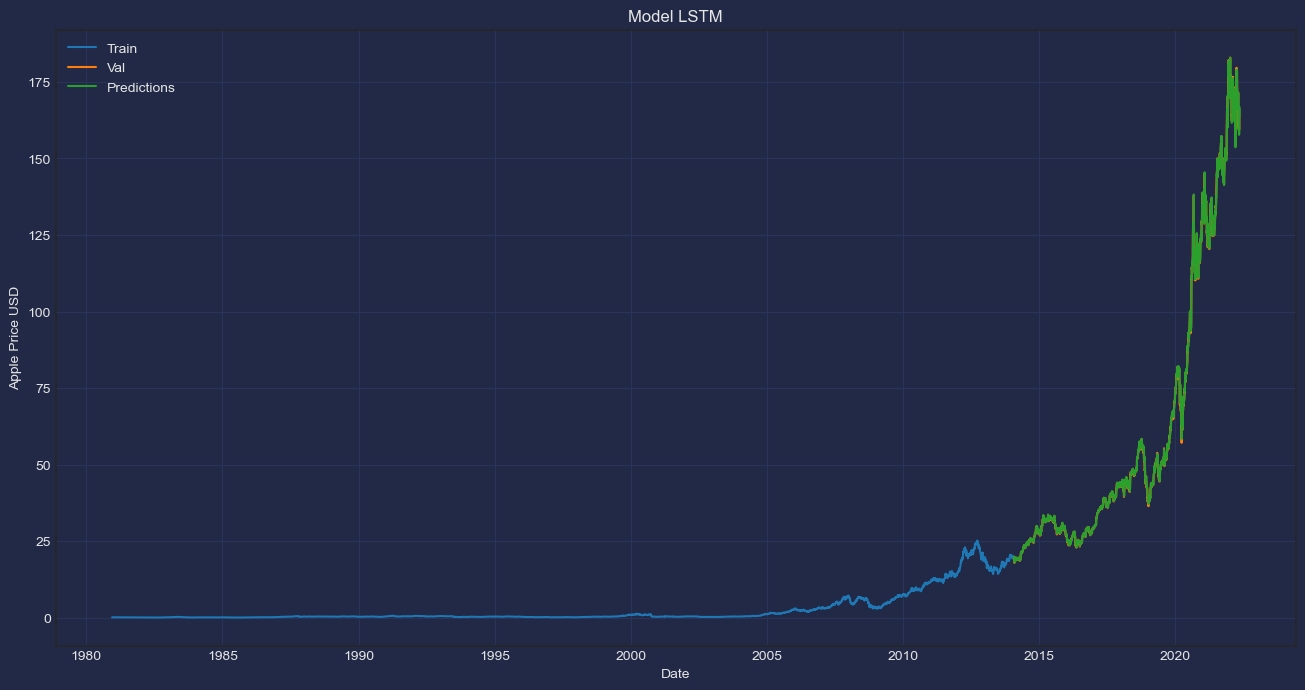

In [43]:
train = train_df[:train_len]
valid = pd.DataFrame(train_df[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Apple Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()

In [44]:
valid

,High,Predictions
Date,,
2014-01-24,19.843571,19.970207
2014-01-27,19.814285,19.939512
2014-01-28,18.392857,19.909666
2014-01-29,18.120358,18.803503
2014-01-30,18.089287,18.271822
...,...,...
2022-05-02,158.229996,166.048004
2022-05-03,160.710007,157.718964
2022-05-04,166.479996,160.736694
